<a href="https://colab.research.google.com/github/ishrakM/AiAlgorithmLearning/blob/main/Classify_iris_flower_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [265]:
raw_train = pd.read_csv('/content/drive/MyDrive/Ai_Colab/iris_data/bezdekIris.data')
raw_test = pd.read_csv('/content/drive/MyDrive/Ai_Colab/iris_data/iris.data')


data_train = raw_train.values
data_test = raw_test.values

#print(data)
data_test.shape

(149, 5)

In [266]:
raw_test.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [267]:
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


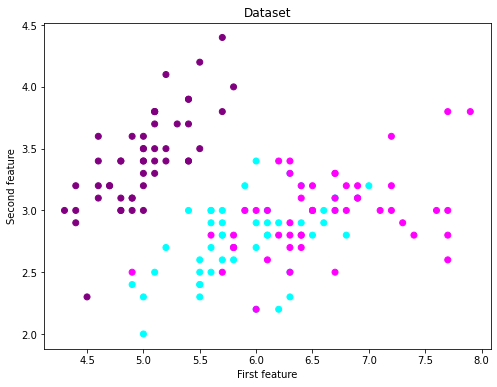

In [268]:
X = data_train[:,0]
y = data_train[:,1]
fig = plt.figure(figsize=(8,6))
color_dict = {'Iris-setosa': 'purple',
              'Iris-versicolor': 'cyan',
              'Iris-virginica': 'magenta'}

plt.scatter(X,y,color = [color_dict[i] for i in data_train[:,-1]])              
#plt.scatter(X[:,0], y[:,1], c=y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [269]:

#Defining data

#first file for trainning and second for testing
    
X_train = data_train[:,0:4]
y_train1 = data_train[:,4]

X_test = data_test[:,0:4]
y_test1 = data_test[:,4]


num_of_training = X_train.shape[0] # number of training data
num_of_testing = X_test.shape[0]  
epochs = 100 

neuron_cell = X_train.shape[1] # number of input neuron_cell
lr = 0.1 #learning rate


In [270]:
y_test_new = y_test1.tolist()

y_test = []
i = 0
ar_length = len(y_test_new)

f1name = "Iris-setosa"
f2naem = "Iris-versicolor"

for i in range(ar_length):
  if y_test_new[i] == f1name:
     y_test.append(0)
  elif y_test_new[i] == f2naem:
     y_test.append(1)
  else:
     y_test.append(2)
++i
    

148

In [271]:
y_train_new = y_train1.tolist()

y_train = []
i = 0
ar_length = len(y_train_new)

f1name = "Iris-setosa"
f2naem = "Iris-versicolor"

for i in range(ar_length):
  if y_train_new[i] == f1name:
     y_train.append(0)
  elif y_train_new[i] == f2naem:
     y_train.append(1)
  else:
     y_train.append(2)
++i
    


148

In [272]:
#print(y_train)
#y_train[0]
type(y_train_new)

list

In [273]:
class Perceptron:

    def __init__(self, neuron_cell, epochs, x_train_data, x_test_data, y_train_data, y_test_data, lr, num_of_training, num_of_testing):

        self.x_train_data = x_train_data
        self.x_test_data = x_test_data
        
        self.y_train_data = y_train_data
        self.y_test_data = y_test_data

        self.num_of_training = num_of_training #number of training samples
        self.num_of_testing = num_of_testing #number of testing samples


        self.epochs = epochs 
        self.lr = lr #learning rate  
        self.neuron_cell = neuron_cell 
        self.bias = 0   #initialized bias 0       
        self.weight = np.zeros(neuron_cell) 

        self.ee = np.zeros(num_of_training) #error difference of predicted value and generated value
        self.mean_sq_err = np.zeros(self.epochs) #mean squared error 
        self.err_point = 0 #testing error tracker
        

    def activation_func(self, x):     # sigmoid function
        y = np.transpose(self.weight).dot(x) + self.bias
      
        y = 1/(1 + np.exp(-y))

       # if y > 0.5:
      #    return 1
      #  else:
       #   return 0

        if y == 1:
            return 1
        elif y < 1:
            return 0
        else:
            return 2


    def tr_learn(self): #learn through the number of traing samples

        for e in range(self.epochs): #total ephoch loop

            for i in range(self.num_of_training): #per ephoch loop
            
                x = self.x_train_data[i, 0:self.neuron_cell]

                d = self.y_train_data[i]
                y = self.activation_func(x)               
                self.ee[i] = d - y #calculate error difference
                n_weight = self.weight + x.dot(self.ee[i] * self.lr) #assigning new weight
                
                self.weight = n_weight
            
            self.mean_sq_err[e] = np.square(self.ee).mean() 

        train_acc = 100 - ((self.ee[self.num_of_training - 1]/self.num_of_training) * 100) #calculate trainning accuracy
 
        print(f'Training accuracy: {train_acc}')
        print(f'epochs: {self.epochs}')




    def predict(self): #predict through testing data and calulate testing accuracy
        
        for i in range(self.num_of_testing):
            x = self.x_test_data[i, 0:self.neuron_cell]
            y = self.activation_func(x)

            if y!=self.y_test_data[i]:  #calculate error points
               self.err_point += 1
     
        testing_accuracy = 100 - ((self.err_point/self.num_of_testing) * 100) # testing accuracy   

        print(f'Total errror points: {self.err_point}')
        print(f'Testing accuracy: {testing_accuracy:.2f}')
        

In [274]:
perceptron = Perceptron(neuron_cell, epochs, X_train, X_test, y_train, y_test, lr, num_of_training, num_of_testing)

perceptron.tr_learn()

perceptron.predict()

Training accuracy: 99.32885906040268
epochs: 100
Total errror points: 99
Testing accuracy: 33.56
